# Suicide Data Analysis

Exploration of interesting trends in suicide data. 

Potential Questions
- Have suicides increased over time? 
- What age group/gender is most susceptible to suicide?
- Can we predict suicide by economic factors (i.e. GDP)?
- Can these factors be used to predict suicide rate for unknown data?

Data sourced from Kaggle : https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016.


## Preliminary Processing

### Import Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style('whitegrid')
sns.set_palette('Accent')

### Explore basic info/structure

In [4]:
df = pd.read_csv('master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
df.shape

(27820, 12)

In [6]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [8]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


### Delete columns that are not used

In [9]:
df.drop(labels=['HDI for year', 'country-year'], axis=1, inplace=True)

## Exploratory Data Analysis

### Total Suicides and Suicide Rate Over Time

In [10]:
gb_year = df.groupby('year').sum()
suicide_rate = gb_year['suicides_no'] / gb_year['population'] * (10**5)

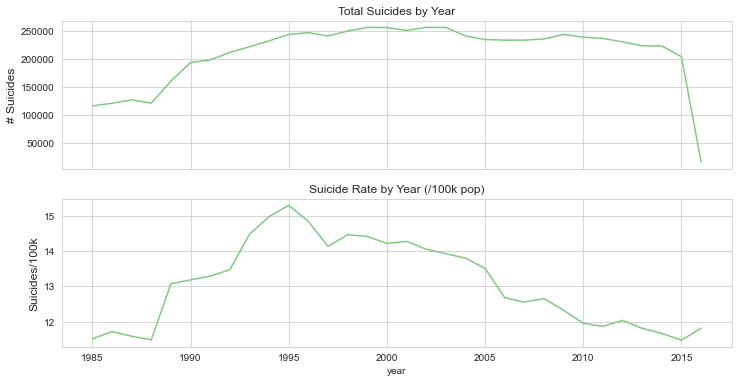

In [11]:
plt.figure(figsize=(12,6))

ax1 = plt.subplot(211)
df.groupby('year').sum()['suicides_no'].plot()
plt.title('Total Suicides by Year', fontsize=12)
plt.ylabel('# Suicides', fontsize=12)
plt.xlabel('Year', fontsize=12)

ax2 = plt.subplot(212, sharex=ax1)
suicide_rate.plot()
plt.title('Suicide Rate by Year (/100k pop)', fontsize=12)
plt.ylabel('Suicides/100k', fontsize=12)

plt.show()

### By Country

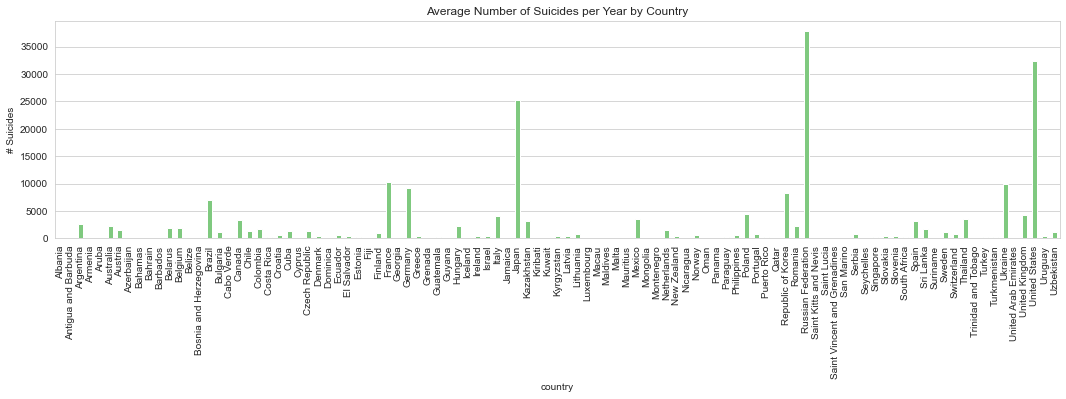

In [12]:
plt.figure(figsize=(18,4))
(df.groupby('country').sum()['suicides_no'] / df['year'].nunique()).plot(kind='bar')
plt.title('Average Number of Suicides per Year by Country')
plt.ylabel('# Suicides')
plt.grid(axis='x')

In [33]:
((gb_country['suicides_no'] / gb_country['population']) * (10**5))

country
Albania                  3.160827
Antigua and Barbuda      0.552700
Argentina                7.936309
Armenia                  2.462889
Aruba                    8.017928
                          ...    
United Arab Emirates     1.704003
United Kingdom           7.867928
United States           12.838459
Uruguay                 15.627650
Uzbekistan               7.154891
Length: 101, dtype: float64

In [41]:
sr_country = ((gb_country['suicides_no'] / gb_country['population']) * (10**5)).reset_index()
sr_country.columns=['Country Name', 'Suicide Rate (per 100K)']
sr_country

,Country Name,Suicide Rate (per 100K)
0,Albania,3.160827
1,Antigua and Barbuda,0.552700
2,Argentina,7.936309
3,Armenia,2.462889
4,Aruba,8.017928
...,...,...
96,United Arab Emirates,1.704003
97,United Kingdom,7.867928
98,United States,12.838459
99,Uruguay,15.627650


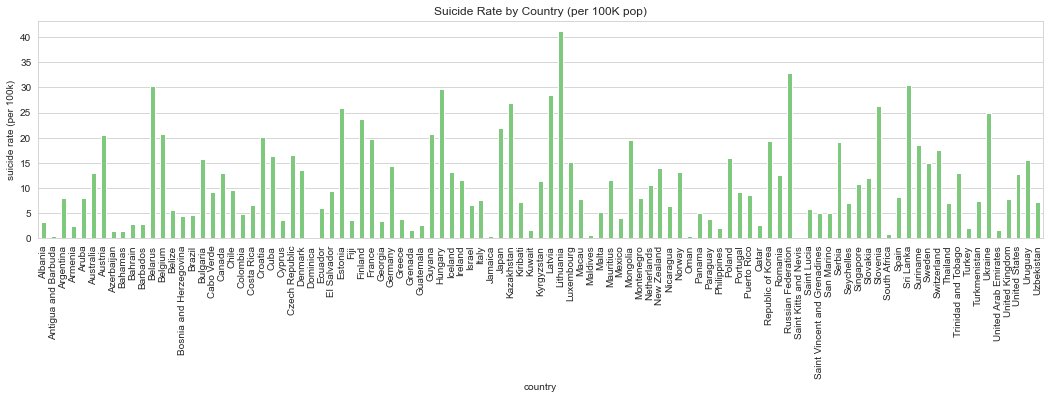

In [13]:
plt.figure(figsize=(18,4))
gb_country = df.groupby('country').sum()
((gb_country['suicides_no'] / gb_country['population']) * (10**5)).plot(kind='bar')
plt.title('Suicide Rate by Country (per 100K pop)')
plt.ylabel('suicide rate (per 100k)')
plt.grid(axis='x')
plt.show()

### By Gender

#### Total and Rate

In [14]:
gb_sex = df.groupby('sex').sum()
sr_sex = (gb_sex['suicides_no'] / gb_sex['population']) * (10 ** 5)

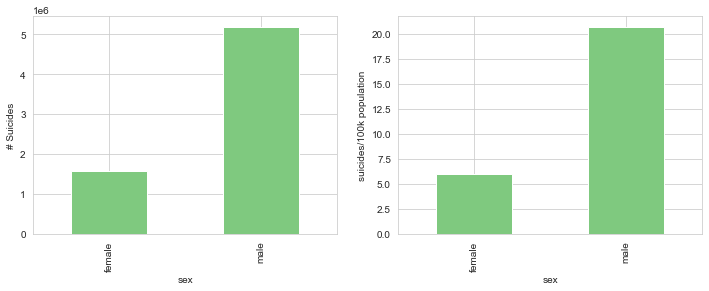

In [15]:
plt.figure(figsize=(12,4))

plt.subplot(121)
df.groupby('sex').sum()['suicides_no'].plot(kind='bar')
plt.ylabel('# Suicides')

plt.subplot(122)
sr_sex.plot(kind='bar')
plt.ylabel('suicides/100k population')

plt.show()

#### By Gender over Time

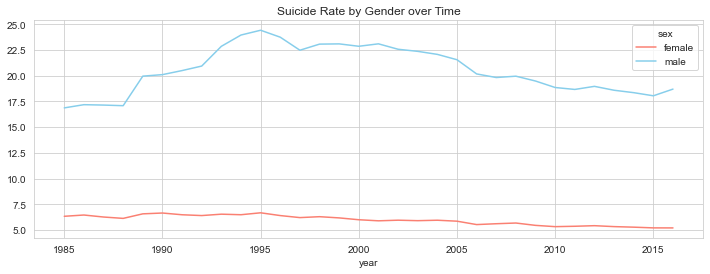

In [16]:
fig, ax = plt.subplots(figsize=(12,4))

df.groupby(['year', 'sex']).sum()[['suicides_no', 'population']].apply(lambda x: (x[0] / x[1]) * (10**5), axis=1)\
.unstack().plot(kind='line', ax=ax, color = ['salmon', 'skyblue'])

plt.title('Suicide Rate by Gender over Time')

plt.show()

### By Age Group & Generation

In [17]:
gb_age = df.groupby('age').sum().reindex(['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'])
sr_age = (gb_age['suicides_no'] / gb_age['population']) * (10**5)

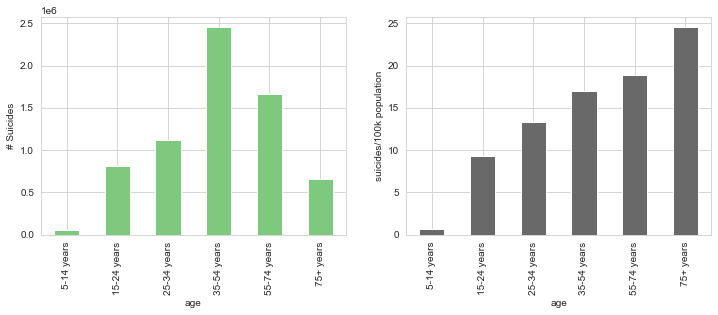

In [18]:
plt.figure(figsize=(12,4))

plt.subplot(121)
gb_age['suicides_no'].plot(kind='bar')
plt.ylabel('# Suicides')

plt.subplot(122)
sr_age.plot(kind='bar', color='dimgrey')
plt.ylabel('suicides/100k population')

plt.show()

#### Rate by Age Group Over Time

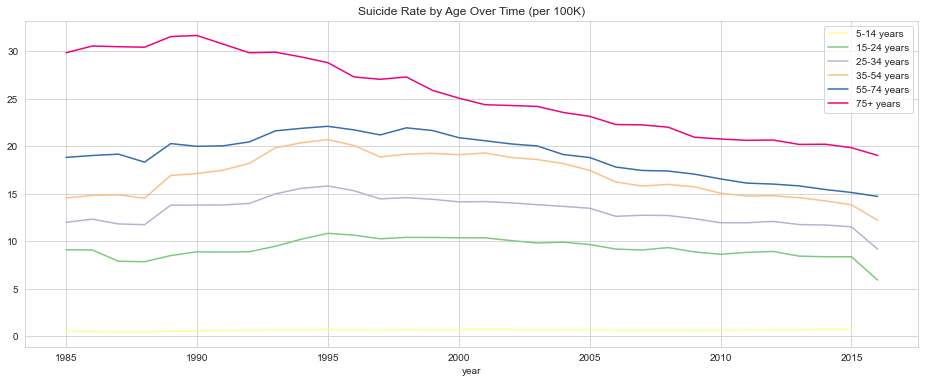

In [19]:
fig, ax = plt.subplots(figsize=(16,6))

df.groupby(['year', 'age']).sum()[['suicides_no', 'population']].apply(lambda x: (x[0] / x[1]) * (10**5), axis=1)\
.unstack().plot(kind='line', ax=ax)

handles, labels = ax.get_legend_handles_labels()
handles = [handles[3], handles[0], handles[1], handles[2], handles[4], handles[5]]
labels = [labels[3], labels[0], labels[1], labels[2], labels[4], labels[5]]

ax.legend(handles, labels)

ax.set_title('Suicide Rate by Age Over Time (per 100K)')
plt.show()

#### By Generation

In [20]:
gb_gen = df.groupby('generation').sum()
sr_gen = (gb_gen['suicides_no'] / gb_gen['population']) * (10**5)

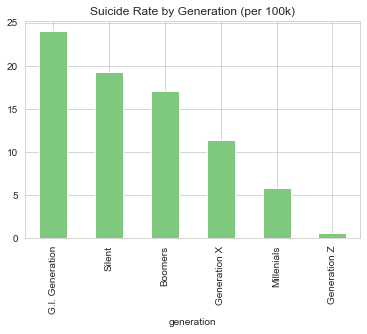

In [21]:
sr_gen.reindex(['G.I. Generation', 'Silent', 'Boomers', 'Generation X','Millenials', 'Generation Z']).plot(kind='bar')
plt.title('Suicide Rate by Generation (per 100k)')
plt.show()

#### By Age and Sex

NameError: name 'age_sex' is not defined

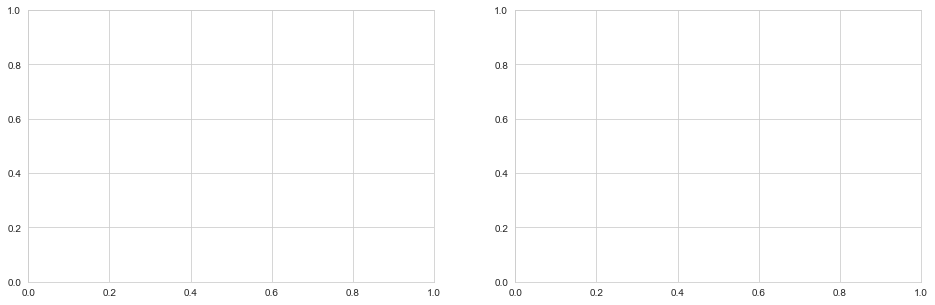

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))

age_sex.unstack().plot(kind='bar', stacked=True, color=['salmon','skyblue'], ax=ax1)

ax1.set_title('Total Suicides by Age Group & Sex')
ax1.legend(title='sex', loc='upper left')

df.groupby(['age', 'sex']).sum()[['suicides_no', 'population']]\
.reindex(['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'], level=0)\
.apply(lambda x: (x[0]/x[1]) * (10**5), axis=1)\
.unstack().plot(kind='bar', color=['salmon', 'skyblue'], ax=ax2)

ax2.set_title('Suicide Rates by Age Group and Sex')

plt.show()

### By GDP

In [ ]:
df.describe()['gdp_per_capita ($)']

In [ ]:
sns.scatterplot(x = 'gdp_per_capita ($)', y='suicides/100k pop', data=df)

In [ ]:
gdppc = df['gdp_per_capita ($)']
condlist = [gdppc.between(0,3447), gdppc.between(3448,9372), gdppc.between(9373, 24874), gdppc > 24875]
choicelist = ['lower', 'lower middle', 'upper middle', 'upper']
df['gdp class'] = np.select(condlist, choicelist, 0)

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='gdp class', y='suicides/100k pop', data=df, showfliers = False)

### Correlations

Format columns correctly

In [ ]:
num_df = df.copy()
num_df['sex'] = df['sex'].map({'male':0, 'female':1})
num_df['age'] = df['age'].map({'5-14 years':0, '15-24 years':1, '25-34 years':2, '35-54 years':3, '55-74 years':4, '75+ years':5})
num_df['gdp class'] = df['gdp class'].map({'lower':0, 'lower middle':1, 'upper middle':2, 'upper':3})

Drop unneeded columns

In [ ]:
num_df.drop(columns=['country', 'year', 'generation', 'suicides_no'], inplace=True)

In [ ]:
num_df.corr()['suicides/100k pop']

Keep Exploring!